## Milestone 2

In [1]:
#importing libraries
import numpy as np
import pandas as pd

In [4]:
#reading csv
df1=pd.read_csv('NIFTY IT.csv')

In [5]:
df1.head()

,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
0,2000-01-03,0.0,0.0,0.0,45015.92,3777566.0,5.584100e+09,196.98,52.27,0.06
1,2000-01-04,0.0,0.0,0.0,48221.50,12128996.0,1.818670e+10,211.00,55.99,0.06
2,2000-01-05,0.0,0.0,0.0,46430.77,23400610.0,3.136010e+10,203.17,53.91,0.06
3,2000-01-06,0.0,0.0,0.0,44433.55,18408571.0,2.370960e+10,194.43,51.59,0.06
4,2000-01-07,0.0,0.0,0.0,41106.21,2762086.0,2.938500e+09,179.87,47.73,0.07


### 1. Replacing Headers

In [6]:
column_list=['Date','Open_value','High_value','Low_value','Close_value','Volume','Turnover','P/E Ratio','P/B Ratio','Dividend Yield']

In [7]:
# replacing the column names
df1.columns=column_list
df1.head()

,Date,Open_value,High_value,Low_value,Close_value,Volume,Turnover,P/E Ratio,P/B Ratio,Dividend Yield
0,2000-01-03,0.0,0.0,0.0,45015.92,3777566.0,5.584100e+09,196.98,52.27,0.06
1,2000-01-04,0.0,0.0,0.0,48221.50,12128996.0,1.818670e+10,211.00,55.99,0.06
2,2000-01-05,0.0,0.0,0.0,46430.77,23400610.0,3.136010e+10,203.17,53.91,0.06
3,2000-01-06,0.0,0.0,0.0,44433.55,18408571.0,2.370960e+10,194.43,51.59,0.06
4,2000-01-07,0.0,0.0,0.0,41106.21,2762086.0,2.938500e+09,179.87,47.73,0.07


### 2. Finding duplicates in Date

In [10]:
# Number of duplicates in date
df1['Date'].duplicated().sum()

1

In [11]:
#removing duplicates
df1.drop_duplicates(subset='Date',keep=False,inplace=True)

In [12]:
df1['Date'].duplicated().sum()

0

### 3.Missing Values

In [13]:
df1.isnull().sum()

Date               0
Open_value         0
High_value         0
Low_value          0
Close_value        0
Volume            10
Turnover          10
P/E Ratio          9
P/B Ratio          9
Dividend Yield     9
dtype: int64

In [14]:
df1=df1.dropna()

In [15]:
df1.isnull().sum()

Date              0
Open_value        0
High_value        0
Low_value         0
Close_value       0
Volume            0
Turnover          0
P/E Ratio         0
P/B Ratio         0
Dividend Yield    0
dtype: int64

### 4. Fix casing or inconsistent values

In [17]:
print(len(df1[df1['Open_value']==0]))
print(len(df1[df1['High_value']==0]))
print(len(df1[df1['Low_value']==0]))

911
911
911


In [18]:
df1.drop(df1[df1['Open_value']==0].index,inplace=True)
df1.drop(df1[df1['High_value']==0].index,inplace=True)
df1.drop(df1[df1['Low_value']==0].index,inplace=True)

In [19]:
print(len(df1[df1['Open_value']==0]))
print(len(df1[df1['High_value']==0]))
print(len(df1[df1['Low_value']==0]))

0
0
0


### 5.Format data into a more readable format

In [20]:
df1['Turnover']=df1['Turnover'].map(lambda x: x/1000000000)

In [21]:
df1.head()

,Date,Open_value,High_value,Low_value,Close_value,Volume,Turnover,P/E Ratio,P/B Ratio,Dividend Yield
911,2003-08-25,13933.45,14193.35,13142.60,13522.95,30749892.0,10.3618,19.99,4.10,0.67
912,2003-08-26,13527.65,14105.60,13527.65,13997.35,28272824.0,7.8772,20.69,4.25,0.65
913,2003-08-27,14156.95,14593.95,14156.95,14527.30,30199773.0,9.5929,21.47,4.41,0.62
914,2003-08-28,14623.90,15151.70,14623.90,15049.20,56136692.0,15.6473,22.25,4.57,0.60
915,2003-08-29,15071.20,15546.55,14932.60,15056.30,47927044.0,13.4988,22.26,4.57,0.60


## Milestone 3

In [22]:
import requests # for http requests
from bs4 import BeautifulSoup # for html parsing and scraping
import bs4 as bs
import re
import urllib
from urllib.request import Request, urlopen

In [23]:
#webscraping
url = 'https://www.moneycontrol.com/stocks/marketinfo/marketcap/bse/it-services-consulting.html'

response = urllib.request.urlopen(url).read()
p = re.findall('<td((.|\s)+?)</td>', str(response)) #(pattern, string)

paragraphs = []
for x in p:
    paragraphs.append(str(x)) 

In [24]:
paragraphs

['(\'><link rel="alternate" title="MoneyControl.com News" href="https://www.moneycontrol.com/rss/latestnews.xml" type="application/rss+xml" />\', \'>\')',
 '(\' width="25%" class="brdrgtgry"><a href="/india/stockpricequote/computerssoftware/tataconsultancyservices/TCS" class="bl_12"><b>TCS</b></a>\\\\n \\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\n \\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t<div class="addPrWhs">\\\\n \\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t<a href="javascript:void(0);" class="mIcon"></a>\\\\n \\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t<div class="ddlist">\\\\n \\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t<ul>\\\\n \\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t<li><a href="javascript:;" onclick="javascript:chkbx_val(\\\\\\\'TCS\\\\\\\',\\\\\\\'1\\\\\\\');" class="watch">Add to Watchlist</a></li>\\\\n \\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\t\\\\

In [25]:
paragraphs.pop(0)

'(\'><link rel="alternate" title="MoneyControl.com News" href="https://www.moneycontrol.com/rss/latestnews.xml" type="application/rss+xml" />\', \'>\')'

In [26]:
column1=[]
column2=[]
column3=[]
column4=[]
column5=[]
column6=[]
i=1
for p in paragraphs:
    if i%6==0:
        column6.append(p)
    elif i%5==0:
        column5.append(p)
    elif i%4==0:
        column4.append(p)
    elif i%3==0:
        column3.append(p)
    elif i%2==0:
        column2.append(p)
    else:
        column1.append(p)
    i+=1

In [27]:
column1=column1[0:70]
column2=column2[0:70]
column3=column3[0:70]
column4=column4[0:70]
column5=column5[0:70]
column6=column6[0:70]
d={0:column1,1:column2,2:column3,3:column4,4:column5,5:column6}

In [28]:
df2=pd.DataFrame(d)

In [29]:
df2

,0,1,2,3,4,5
0,"(' width=""25%"" class=""brdrgtgry""><a href=""/ind...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">3,461.90', ...","(' align=""right"" class=""brdrgtgry"">2,217.05', ...","(' align=""right"" class=""brdrgtgry"">1,280,574.5..."
1,"(' width=""25%"" class=""brdrgtgry""><a href=""/ind...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">1,712.50', ...","(' align=""right"" class=""brdrgtgry"">729,368.44'..."
2,"(' align=""right"" class=""brdrgtgry"">912.60', '0')","(' align=""right"" class=""brdrgtgry"">1,119.70', ...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">615.50', '0')","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">337,247.44'..."
3,"(' width=""25%"" class=""brdrgtgry""><a href=""/ind...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">1,382.75', ...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">303,849.08'..."
4,"(' align=""right"" class=""brdrgtgry"">269.00', '0')","(' align=""right"" class=""brdrgtgry"">4,865.00', ...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' width=""25%"" class=""brdrgtgry""><a href=""/ind...","(' align=""right"" class=""brdrgtgry"">134,004.81'..."
...,...,...,...,...,...,...
65,"(' width=""25%"" class=""brdrgtgry""><a href=""/ind...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">13.84', '4')","(' align=""right"" class=""brdrgtgry"">73.27', '7')"
66,"(' align=""right"" class=""brdrgtgry"">43.85', '5')","(' align=""right"" class=""brdrgtgry"">8.13', '3')","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">11.78', '8')","(' align=""right"" class=""brdrgtgry"">77.25', '5')","(' align=""right"" class=""brdrgtgry"">71.47', '7')"
67,"(' width=""25%"" class=""brdrgtgry""><a href=""/ind...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">10.55', '5')","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">52.01', '1')"
68,"(' align=""right"" class=""brdrgtgry"">12.20', '0')","(' align=""right"" class=""brdrgtgry"">12.60', '0')","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">40.92', '2')"


### 1. Replace Headers

In [30]:
df2.rename(columns={0:'Company Name',1:'Last Price',2:'% Change',3:'52 wk High',4:'52 wk Low',5:'Market Cap (Rs. cr)'},inplace=True)

In [31]:
df2.head()

,Company Name,Last Price,% Change,52 wk High,52 wk Low,Market Cap (Rs. cr)
0,"(' width=""25%"" class=""brdrgtgry""><a href=""/ind...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">3,461.90', ...","(' align=""right"" class=""brdrgtgry"">2,217.05', ...","(' align=""right"" class=""brdrgtgry"">1,280,574.5..."
1,"(' width=""25%"" class=""brdrgtgry""><a href=""/ind...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">1,712.50', ...","(' align=""right"" class=""brdrgtgry"">729,368.44'..."
2,"(' align=""right"" class=""brdrgtgry"">912.60', '0')","(' align=""right"" class=""brdrgtgry"">1,119.70', ...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">615.50', '0')","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">337,247.44'..."
3,"(' width=""25%"" class=""brdrgtgry""><a href=""/ind...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">1,382.75', ...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">303,849.08'..."
4,"(' align=""right"" class=""brdrgtgry"">269.00', '0')","(' align=""right"" class=""brdrgtgry"">4,865.00', ...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' width=""25%"" class=""brdrgtgry""><a href=""/ind...","(' align=""right"" class=""brdrgtgry"">134,004.81'..."


In [32]:
df2['Company Name']=df2['Company Name'].apply(lambda x: re.findall('<b>((.|\s)+?)</b>', x))

In [33]:
df2.head()

,Company Name,Last Price,% Change,52 wk High,52 wk Low,Market Cap (Rs. cr)
0,"[(TCS, S)]","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">3,461.90', ...","(' align=""right"" class=""brdrgtgry"">2,217.05', ...","(' align=""right"" class=""brdrgtgry"">1,280,574.5..."
1,"[(Infosys, s)]","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">1,712.50', ...","(' align=""right"" class=""brdrgtgry"">729,368.44'..."
2,[],"(' align=""right"" class=""brdrgtgry"">1,119.70', ...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">615.50', '0')","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">337,247.44'..."
3,"[(Wipro, o)]","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">1,382.75', ...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">303,849.08'..."
4,[],"(' align=""right"" class=""brdrgtgry"">4,865.00', ...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' width=""25%"" class=""brdrgtgry""><a href=""/ind...","(' align=""right"" class=""brdrgtgry"">134,004.81'..."


In [34]:
df2['Company Name']=df2['Company Name'].apply(lambda x: x[0] if len(x)>0 else False)

In [35]:
df2

,Company Name,Last Price,% Change,52 wk High,52 wk Low,Market Cap (Rs. cr)
0,"(TCS, S)","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">3,461.90', ...","(' align=""right"" class=""brdrgtgry"">2,217.05', ...","(' align=""right"" class=""brdrgtgry"">1,280,574.5..."
1,"(Infosys, s)","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">1,712.50', ...","(' align=""right"" class=""brdrgtgry"">729,368.44'..."
2,False,"(' align=""right"" class=""brdrgtgry"">1,119.70', ...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">615.50', '0')","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">337,247.44'..."
3,"(Wipro, o)","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">1,382.75', ...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">303,849.08'..."
4,False,"(' align=""right"" class=""brdrgtgry"">4,865.00', ...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' width=""25%"" class=""brdrgtgry""><a href=""/ind...","(' align=""right"" class=""brdrgtgry"">134,004.81'..."
...,...,...,...,...,...,...
65,"(ASM Tech, h)","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">13.84', '4')","(' align=""right"" class=""brdrgtgry"">73.27', '7')"
66,False,"(' align=""right"" class=""brdrgtgry"">8.13', '3')","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">11.78', '8')","(' align=""right"" class=""brdrgtgry"">77.25', '5')","(' align=""right"" class=""brdrgtgry"">71.47', '7')"
67,"(Majesco, o)","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">10.55', '5')","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">52.01', '1')"
68,False,"(' align=""right"" class=""brdrgtgry"">12.60', '0')","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">40.92', '2')"


In [36]:
df2.drop(df2[df2['Company Name']==False].index,inplace=True)

In [37]:
df2

,Company Name,Last Price,% Change,52 wk High,52 wk Low,Market Cap (Rs. cr)
0,"(TCS, S)","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">3,461.90', ...","(' align=""right"" class=""brdrgtgry"">2,217.05', ...","(' align=""right"" class=""brdrgtgry"">1,280,574.5..."
1,"(Infosys, s)","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">1,712.50', ...","(' align=""right"" class=""brdrgtgry"">729,368.44'..."
3,"(Wipro, o)","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">1,382.75', ...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">303,849.08'..."
5,"(HCL Tech, h)","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">2,310.15', ...","(' align=""right"" class=""brdrgtgry"">85,092.50',..."
8,"(L&T Infotech, h)","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">3,295.00', ...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">39,668.39',..."
9,"(MphasiS, S)","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' width=""25%"" class=""brdrgtgry""><a href=""/ind...","(' align=""right"" class=""brdrgtgry"">29,045.87',..."
11,"(Mindtree, e)","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">6,287.00', ...","(' align=""right"" class=""brdrgtgry"">1,580.80', ...","(' align=""right"" class=""brdrgtgry"">20,480.86',..."
13,"(Oracle Fin Serv, v)","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">11,421.25',..."
16,"(Persistent, t)","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">2,873.20', ...","(' align=""right"" class=""brdrgtgry"">434.00', '0')","(' align=""right"" class=""brdrgtgry"">9,436.47', ..."
17,"(Happiest Minds , )","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">9,124.88', ..."


In [38]:
df2['Company Name']=df2['Company Name'].apply(lambda x: x[0])

In [39]:
df2

,Company Name,Last Price,% Change,52 wk High,52 wk Low,Market Cap (Rs. cr)
0,TCS,"(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">3,461.90', ...","(' align=""right"" class=""brdrgtgry"">2,217.05', ...","(' align=""right"" class=""brdrgtgry"">1,280,574.5..."
1,Infosys,"(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">1,712.50', ...","(' align=""right"" class=""brdrgtgry"">729,368.44'..."
3,Wipro,"(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">1,382.75', ...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">303,849.08'..."
5,HCL Tech,"(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">2,310.15', ...","(' align=""right"" class=""brdrgtgry"">85,092.50',..."
8,L&T Infotech,"(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">3,295.00', ...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">39,668.39',..."
9,MphasiS,"(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' width=""25%"" class=""brdrgtgry""><a href=""/ind...","(' align=""right"" class=""brdrgtgry"">29,045.87',..."
11,Mindtree,"(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">6,287.00', ...","(' align=""right"" class=""brdrgtgry"">1,580.80', ...","(' align=""right"" class=""brdrgtgry"">20,480.86',..."
13,Oracle Fin Serv,"(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">11,421.25',..."
16,Persistent,"(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">2,873.20', ...","(' align=""right"" class=""brdrgtgry"">434.00', '0')","(' align=""right"" class=""brdrgtgry"">9,436.47', ..."
17,Happiest Minds,"(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"" style=""colo...","(' align=""right"" class=""brdrgtgry"">9,124.88', ..."


In [40]:
df2['Last Price']=df2['Last Price'].apply(lambda x: x.split(',')[1][0:-1])

In [41]:
df2['% Change']=df2['% Change'].apply(lambda x: x.split('>')[1].split(',')[0][0:-1])

In [42]:
df2['52 wk High']=df2['52 wk High'].apply(lambda x: x.split('>')[1][0:-7])

In [43]:
df2['52 wk Low']=df2['52 wk Low'].apply(lambda x: x.split('>')[1][0:-7])

In [44]:
df2['Market Cap (Rs. cr)']=df2['Market Cap (Rs. cr)'].apply(lambda x: x.split('>')[1][0:-7])

### 3. Missing Values

In [45]:
df2

,Company Name,Last Price,% Change,52 wk High,52 wk Low,Market Cap (Rs. cr)
0,TCS,461.90,3.22,"3,461.90","2,217.05","1,280,574.59"
1,Infosys,'0',1.30,"1,712.50","1,712.50","729,368.44"
3,Wipro,382.75,-0.31,"1,382.75","1,119.70","303,849.08"
5,HCL Tech,748.00,-0.63,"2,922.55","2,310.15","85,092.50"
8,L&T Infotech,128.00,-1.23,"3,295.00","4,605.25","39,668.39"
9,MphasiS,'0',0.39,"1,394.55","<a href=""/india/stockpricequote/computerssoftw...","29,045.87"
11,Mindtree,191.05,0.73,"6,287.00","1,580.80","20,480.86"
13,Oracle Fin Serv,'0',-0.01,332.85,"1,972.15","11,421.25"
16,Persistent,443.00,0.08,"2,873.20",434.00,"9,436.47"
17,Happiest Minds,245.75,-1.47,194.00,5.73,"9,124.88"


In [46]:
df2=df2.drop([df2.index[5],df2.index[10],df2.index[12],df2.index[15],df2.index[25],df2.index[30],df2.index[32],df2.index[35]])

In [47]:
df2

,Company Name,Last Price,% Change,52 wk High,52 wk Low,Market Cap (Rs. cr)
0,TCS,461.90,3.22,"3,461.90","2,217.05","1,280,574.59"
1,Infosys,'0',1.30,"1,712.50","1,712.50","729,368.44"
3,Wipro,382.75,-0.31,"1,382.75","1,119.70","303,849.08"
5,HCL Tech,748.00,-0.63,"2,922.55","2,310.15","85,092.50"
8,L&T Infotech,128.00,-1.23,"3,295.00","4,605.25","39,668.39"
11,Mindtree,191.05,0.73,"6,287.00","1,580.80","20,480.86"
13,Oracle Fin Serv,'0',-0.01,332.85,"1,972.15","11,421.25"
16,Persistent,443.00,0.08,"2,873.20",434.00,"9,436.47"
17,Happiest Minds,245.75,-1.47,194.00,5.73,"9,124.88"
21,Route,'5',-0.17,7.99,211.45,"2,320.95"


### 4. Identify outliers and bad data

In [48]:
df2.drop(df2[df2['Last Price']==" '0'"].index,inplace=True)

In [49]:
df2.drop(df2[df2['Last Price']==" '5'"].index,inplace=True)
df2.drop(df2[df2['Last Price']==" '4'"].index,inplace=True)

In [50]:
df2

,Company Name,Last Price,% Change,52 wk High,52 wk Low,Market Cap (Rs. cr)
0,TCS,461.90,3.22,"3,461.90","2,217.05","1,280,574.59"
3,Wipro,382.75,-0.31,"1,382.75","1,119.70","303,849.08"
5,HCL Tech,748.00,-0.63,"2,922.55","2,310.15","85,092.50"
8,L&T Infotech,128.00,-1.23,"3,295.00","4,605.25","39,668.39"
11,Mindtree,191.05,0.73,"6,287.00","1,580.80","20,480.86"
16,Persistent,443.00,0.08,"2,873.20",434.00,"9,436.47"
17,Happiest Minds,245.75,-1.47,194.00,5.73,"9,124.88"
35,Sasken Tech,'8',-4.55,1.98,33.10,424.84
48,Kellton Tech,'6',-5.00,3.41,59.10,135.49
61,Securekloud Tec,'9',4.03,37.00,85.00,79.33


### 5.Format data into a more readable format

In [51]:
df2['Market Cap (Rs. cr)']=df2['Market Cap (Rs. cr)'].apply(lambda x: x.replace(',',""))

In [52]:
df2['Market Cap (Rs. cr)'] = df2['Market Cap (Rs. cr)'].astype(float)

In [53]:
df2['Market Cap (Rs. cr)']=df2['Market Cap (Rs. cr)'].map(lambda x: x/1000)

In [54]:
df2

,Company Name,Last Price,% Change,52 wk High,52 wk Low,Market Cap (Rs. cr)
0,TCS,461.90,3.22,"3,461.90","2,217.05",1280.57459
3,Wipro,382.75,-0.31,"1,382.75","1,119.70",303.84908
5,HCL Tech,748.00,-0.63,"2,922.55","2,310.15",85.09250
8,L&T Infotech,128.00,-1.23,"3,295.00","4,605.25",39.66839
11,Mindtree,191.05,0.73,"6,287.00","1,580.80",20.48086
16,Persistent,443.00,0.08,"2,873.20",434.00,9.43647
17,Happiest Minds,245.75,-1.47,194.00,5.73,9.12488
35,Sasken Tech,'8',-4.55,1.98,33.10,0.42484
48,Kellton Tech,'6',-5.00,3.41,59.10,0.13549
61,Securekloud Tec,'9',4.03,37.00,85.00,0.07933


In [55]:
df2.rename(columns={'Market Cap (Rs. cr)':'Market Cap (Rs. 1000 cr)'}, inplace=True)

In [56]:
df2

,Company Name,Last Price,% Change,52 wk High,52 wk Low,Market Cap (Rs. 1000 cr)
0,TCS,461.90,3.22,"3,461.90","2,217.05",1280.57459
3,Wipro,382.75,-0.31,"1,382.75","1,119.70",303.84908
5,HCL Tech,748.00,-0.63,"2,922.55","2,310.15",85.09250
8,L&T Infotech,128.00,-1.23,"3,295.00","4,605.25",39.66839
11,Mindtree,191.05,0.73,"6,287.00","1,580.80",20.48086
16,Persistent,443.00,0.08,"2,873.20",434.00,9.43647
17,Happiest Minds,245.75,-1.47,194.00,5.73,9.12488
35,Sasken Tech,'8',-4.55,1.98,33.10,0.42484
48,Kellton Tech,'6',-5.00,3.41,59.10,0.13549
61,Securekloud Tec,'9',4.03,37.00,85.00,0.07933


## Milestone 4

In [86]:
import requests
import json

In [87]:
# base url
url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/v2/get-chart"
headers = {
    'x-rapidapi-key': "6013b062b0msh87263ae05743716p1581f3jsn0c276958cf27",
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com"
    }

In [88]:
#Getting Data of Infosys
querystring = {"symbol":"INFY","region":"IND"}

infyResponse = requests.request("GET", url, headers=headers, params=querystring)

print(infyResponse.text)

{"chart":{"result":[{"meta":{"currency":"USD","symbol":"INFY","exchangeName":"NYQ","instrumentType":"EQUITY","firstTradeDate":921162600,"regularMarketTime":1628868780,"gmtoffset":-14400,"timezone":"EDT","exchangeTimezoneName":"America/New_York","regularMarketPrice":23.51,"chartPreviousClose":23.32,"previousClose":23.32,"scale":3,"priceHint":2,"currentTradingPeriod":{"pre":{"timezone":"EDT","start":1628841600,"end":1628861400,"gmtoffset":-14400},"regular":{"timezone":"EDT","start":1628861400,"end":1628884800,"gmtoffset":-14400},"post":{"timezone":"EDT","start":1628884800,"end":1628899200,"gmtoffset":-14400}},"tradingPeriods":{"pre":[[{"timezone":"EDT","start":1628841600,"end":1628861400,"gmtoffset":-14400}]],"post":[[{"timezone":"EDT","start":1628884800,"end":1628899200,"gmtoffset":-14400}]],"regular":[[{"timezone":"EDT","start":1628861400,"end":1628884800,"gmtoffset":-14400}]]},"dataGranularity":"5m","range":"1d","validRanges":["1d","5d","1mo","3mo","6mo","1y","2y","5y","10y","ytd","ma

In [89]:
infy_json=json.loads(infyResponse.text)

In [90]:
# creating the dataframe
df3=pd.DataFrame()

In [91]:
infy_json['chart']['result']

[{'meta': {'currency': 'USD',
   'symbol': 'INFY',
   'exchangeName': 'NYQ',
   'instrumentType': 'EQUITY',
   'firstTradeDate': 921162600,
   'regularMarketTime': 1628868780,
   'gmtoffset': -14400,
   'timezone': 'EDT',
   'exchangeTimezoneName': 'America/New_York',
   'regularMarketPrice': 23.51,
   'chartPreviousClose': 23.32,
   'previousClose': 23.32,
   'scale': 3,
   'priceHint': 2,
   'currentTradingPeriod': {'pre': {'timezone': 'EDT',
     'start': 1628841600,
     'end': 1628861400,
     'gmtoffset': -14400},
    'regular': {'timezone': 'EDT',
     'start': 1628861400,
     'end': 1628884800,
     'gmtoffset': -14400},
    'post': {'timezone': 'EDT',
     'start': 1628884800,
     'end': 1628899200,
     'gmtoffset': -14400}},
   'tradingPeriods': {'pre': [[{'timezone': 'EDT',
       'start': 1628841600,
       'end': 1628861400,
       'gmtoffset': -14400}]],
    'post': [[{'timezone': 'EDT',
       'start': 1628884800,
       'end': 1628899200,
       'gmtoffset': -14400}]

In [92]:
df3['timestamp']=infy_json['chart']['result'][0]['timestamp']

In [93]:
df3.head()

,timestamp
0,1628842800
1,1628843100
2,1628844000
3,1628852400
4,1628853600


In [94]:
df3=df3.dropna()

In [95]:
df3['low']=infy_json['chart']['result'][0]['indicators']['quote'][0]['low']

In [96]:
df3['volume']=infy_json['chart']['result'][0]['indicators']['quote'][0]['volume']

In [97]:
df3['open']=infy_json['chart']['result'][0]['indicators']['quote'][0]['open']

In [98]:
df3['close']=infy_json['chart']['result'][0]['indicators']['quote'][0]['close']

In [99]:
df3['high']=infy_json['chart']['result'][0]['indicators']['quote'][0]['high']

In [100]:
df3

,timestamp,low,volume,open,close,high
0,1628842800,23.480000,0,23.480000,23.480000,23.480000
1,1628843100,23.480000,0,23.480000,23.490000,23.490000
2,1628844000,23.460000,0,23.460000,23.460000,23.460000
3,1628852400,23.450000,0,23.450000,23.450000,23.450000
4,1628853600,23.520000,0,23.520000,23.520000,23.520000
5,1628853900,23.550000,0,23.550000,23.550000,23.550000
6,1628855100,23.530000,0,23.530000,23.530000,23.530000
7,1628856000,23.530000,0,23.530000,23.530000,23.530000
8,1628856300,23.530000,0,23.530000,23.530000,23.530000
9,1628856600,23.520000,0,23.520000,23.520000,23.520000


### 1. Missing Value

In [101]:
df3[df3['volume']==0]

,timestamp,low,volume,open,close,high
0,1628842800,23.48,0,23.48,23.48,23.48
1,1628843100,23.48,0,23.48,23.49,23.49
2,1628844000,23.46,0,23.46,23.46,23.46
3,1628852400,23.45,0,23.45,23.45,23.45
4,1628853600,23.52,0,23.52,23.52,23.52
5,1628853900,23.55,0,23.55,23.55,23.55
6,1628855100,23.53,0,23.53,23.53,23.53
7,1628856000,23.53,0,23.53,23.53,23.53
8,1628856300,23.53,0,23.53,23.53,23.53
9,1628856600,23.52,0,23.52,23.52,23.52


In [102]:
# droping rows having volume zero
df3=df3.drop(df3[df3.volume==0].index)

In [103]:
df3.head()

,timestamp,low,volume,open,close,high
13,1628861400,23.379999,315376,23.389999,23.405001,23.469999
14,1628861700,23.370001,101541,23.410000,23.465000,23.480000
15,1628862000,23.450001,26174,23.459999,23.485001,23.490000
16,1628862300,23.469999,48358,23.485001,23.504999,23.510000
17,1628862600,23.500000,70984,23.504999,23.549801,23.549999


### 2. Format data into a more readable format

In [104]:
from datetime import datetime
df3['timestamp']=df3['timestamp'].map(lambda a:datetime.fromtimestamp(a))

In [105]:
df3.head()

,timestamp,low,volume,open,close,high
13,2021-08-13 08:30:00,23.379999,315376,23.389999,23.405001,23.469999
14,2021-08-13 08:35:00,23.370001,101541,23.410000,23.465000,23.480000
15,2021-08-13 08:40:00,23.450001,26174,23.459999,23.485001,23.490000
16,2021-08-13 08:45:00,23.469999,48358,23.485001,23.504999,23.510000
17,2021-08-13 08:50:00,23.500000,70984,23.504999,23.549801,23.549999


### 3. Identifying outliers and bad data

In [106]:
df3.drop(df3[df3['volume']<10000].index,inplace=True)

In [107]:
df3

,timestamp,low,volume,open,close,high
13,2021-08-13 08:30:00,23.379999,315376,23.389999,23.405001,23.469999
14,2021-08-13 08:35:00,23.370001,101541,23.410000,23.465000,23.480000
15,2021-08-13 08:40:00,23.450001,26174,23.459999,23.485001,23.490000
16,2021-08-13 08:45:00,23.469999,48358,23.485001,23.504999,23.510000
17,2021-08-13 08:50:00,23.500000,70984,23.504999,23.549801,23.549999
18,2021-08-13 08:55:00,23.530001,52641,23.549999,23.530001,23.570000
19,2021-08-13 09:00:00,23.530001,39125,23.535000,23.559999,23.570000
20,2021-08-13 09:05:00,23.570000,48819,23.570000,23.605000,23.605000
21,2021-08-13 09:10:00,23.575001,32789,23.605000,23.580000,23.605000
22,2021-08-13 09:15:00,23.584999,22078,23.584999,23.610001,23.610001


### 4. Replacing Header

In [108]:
df3.rename(columns={'timestamp':'Date','low':'Low','volume':'Volume','open':'Open','high':'High'},inplace=True)

In [109]:
df3.head()

,Date,Low,Volume,Open,close,High
13,2021-08-13 08:30:00,23.379999,315376,23.389999,23.405001,23.469999
14,2021-08-13 08:35:00,23.370001,101541,23.410000,23.465000,23.480000
15,2021-08-13 08:40:00,23.450001,26174,23.459999,23.485001,23.490000
16,2021-08-13 08:45:00,23.469999,48358,23.485001,23.504999,23.510000
17,2021-08-13 08:50:00,23.500000,70984,23.504999,23.549801,23.549999


### 5. Fix casing or inconsistent values

In [110]:
df3['Date']=df3['Date'].map(lambda a:str(a))

In [111]:
df3.head()

,Date,Low,Volume,Open,close,High
13,2021-08-13 08:30:00,23.379999,315376,23.389999,23.405001,23.469999
14,2021-08-13 08:35:00,23.370001,101541,23.410000,23.465000,23.480000
15,2021-08-13 08:40:00,23.450001,26174,23.459999,23.485001,23.490000
16,2021-08-13 08:45:00,23.469999,48358,23.485001,23.504999,23.510000
17,2021-08-13 08:50:00,23.500000,70984,23.504999,23.549801,23.549999


In [112]:
df3['Date']=df3['Date'].map(lambda a:a[:11])

In [113]:
df3

,Date,Low,Volume,Open,close,High
13,2021-08-13,23.379999,315376,23.389999,23.405001,23.469999
14,2021-08-13,23.370001,101541,23.410000,23.465000,23.480000
15,2021-08-13,23.450001,26174,23.459999,23.485001,23.490000
16,2021-08-13,23.469999,48358,23.485001,23.504999,23.510000
17,2021-08-13,23.500000,70984,23.504999,23.549801,23.549999
18,2021-08-13,23.530001,52641,23.549999,23.530001,23.570000
19,2021-08-13,23.530001,39125,23.535000,23.559999,23.570000
20,2021-08-13,23.570000,48819,23.570000,23.605000,23.605000
21,2021-08-13,23.575001,32789,23.605000,23.580000,23.605000
22,2021-08-13,23.584999,22078,23.584999,23.610001,23.610001


## Milestone 5

In [114]:
#importing sqlite libraries
import sqlite3
from sqlite3 import Error

In [118]:
from sqlalchemy import create_engine

In [120]:
engine = create_engine('sqlite:///final.db', echo=True)
sqlite_connection = engine.connect()

2021-08-13 11:56:11,244 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-08-13 11:56:11,244 INFO sqlalchemy.engine.base.Engine ()
2021-08-13 11:56:11,248 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-08-13 11:56:11,249 INFO sqlalchemy.engine.base.Engine ()


In [123]:
#saving all the dataframe as table in database
df1.to_sql("df1", sqlite_connection, if_exists='fail')
df2.to_sql("df2", sqlite_connection, if_exists='fail')
df3.to_sql("df3", sqlite_connection, if_exists='fail')

2021-08-13 11:58:09,847 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("df1")
2021-08-13 11:58:09,848 INFO sqlalchemy.engine.base.Engine ()
2021-08-13 11:58:09,850 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("df1")
2021-08-13 11:58:09,851 INFO sqlalchemy.engine.base.Engine ()
2021-08-13 11:58:09,853 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE df1 (
	"index" BIGINT, 
	"Date" TEXT, 
	"Open_value" FLOAT, 
	"High_value" FLOAT, 
	"Low_value" FLOAT, 
	"Close_value" FLOAT, 
	"Volume" FLOAT, 
	"Turnover" FLOAT, 
	"P/E Ratio" FLOAT, 
	"P/B Ratio" FLOAT, 
	"Dividend Yield" FLOAT
)


2021-08-13 11:58:09,854 INFO sqlalchemy.engine.base.Engine ()
2021-08-13 11:58:09,860 INFO sqlalchemy.engine.base.Engine COMMIT
2021-08-13 11:58:09,861 INFO sqlalchemy.engine.base.Engine CREATE INDEX ix_df1_index ON df1 ("index")
2021-08-13 11:58:09,861 INFO sqlalchemy.engine.base.Engine ()
2021-08-13 11:58:09,867 INFO sqlalchemy.engine.base.Engine COMMIT
2021-08-13 11:58:09,874 INFO sql

In [124]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

In [128]:
def select_table(conn,tablename):
    """
    Query all rows in the tasks table
    :param conn: the Connection object
    :return:
    """
    cur = conn.cursor()
    cur.execute("SELECT * FROM "+tablename)

    rows = cur.fetchall()

    for row in rows:
        print(row)

In [133]:
#creating connection
conn=create_connection("final.db")

In [134]:
#selecting df1
select_table(conn,"df1")

(911, '2003-08-25', 13933.45, 14193.35, 13142.6, 13522.95, 30749892.0, 10.3618, 19.99, 4.1, 0.67)
(912, '2003-08-26', 13527.65, 14105.6, 13527.65, 13997.35, 28272824.0, 7.8772, 20.69, 4.25, 0.65)
(913, '2003-08-27', 14156.95, 14593.95, 14156.95, 14527.3, 30199773.0, 9.5929, 21.47, 4.41, 0.62)
(914, '2003-08-28', 14623.9, 15151.7, 14623.9, 15049.2, 56136692.0, 15.6473, 22.25, 4.57, 0.6)
(915, '2003-08-29', 15071.2, 15546.55, 14932.6, 15056.3, 47927044.0, 13.498800000000001, 22.26, 4.57, 0.6)
(916, '2003-09-01', 15057.85, 15360.1, 15050.75, 15283.95, 25717280.0, 7.6449, 22.59, 4.64, 0.59)
(917, '2003-09-02', 15311.9, 15601.1, 15187.25, 15544.3, 39769777.0, 11.7496, 22.98, 4.72, 0.58)
(918, '2003-09-03', 15779.9, 15901.8, 15171.8, 15275.3, 40565711.0, 12.3465, 22.58, 4.63, 0.59)
(919, '2003-09-04', 15340.2, 16467.5, 15340.2, 16358.25, 44656809.0, 19.3207, 24.18, 4.96, 0.55)
(920, '2003-09-05', 16436.25, 16778.1, 16371.15, 16712.6, 44867799.0, 14.7816, 24.71, 5.07, 0.54)
(921, '2003-09-08'

(2926, '2011-09-19', 5491.05, 5498.9, 5434.85, 5443.4, 22660093.0, 5.993200000000001, 18.92, 5.09, 1.96)
(2927, '2011-09-20', 5467.85, 5623.8, 5459.85, 5613.35, 21862738.0, 7.956900000000002, 19.51, 5.25, 1.91)
(2928, '2011-09-21', 5634.15, 5662.5, 5574.55, 5606.95, 16900183.0, 6.988, 19.49, 5.24, 1.91)
(2929, '2011-09-22', 5502.8, 5536.95, 5349.65, 5385.3, 15641813.0, 6.9612, 18.72, 5.03, 1.99)
(2930, '2011-09-23', 5340.85, 5465.9, 5333.35, 5367.75, 16813766.0, 8.5508, 18.66, 5.02, 1.99)
(2931, '2011-09-26', 5385.2, 5415.45, 5278.5, 5387.65, 13716165.0, 5.6709, 18.73, 5.04, 1.98)
(2932, '2011-09-27', 5444.1, 5617.25, 5444.1, 5579.7, 12560529.0, 7.0185, 19.39, 5.22, 1.92)
(2933, '2011-09-28', 5640.95, 5749.6, 5592.1, 5623.9, 17568102.0, 11.736, 19.55, 5.26, 1.9)
(2934, '2011-09-29', 5630.35, 5764.45, 5605.5, 5746.15, 28437386.0, 14.3358, 19.97, 5.37, 1.86)
(2935, '2011-09-30', 5709.0, 5771.3, 5658.75, 5678.9, 16374742.0, 7.2025, 19.74, 5.31, 1.88)
(2936, '2011-10-03', 5592.8, 5632.8, 5

(4954, '2019-12-02', 15056.85, 15070.65, 14819.4, 14852.0, 26527817.0, 22.332800000000002, 20.01, 4.94, 2.07)
(4955, '2019-12-03', 14870.9, 14956.45, 14808.4, 14920.75, 23102025.0, 21.035300000000003, 20.1, 4.96, 2.06)
(4956, '2019-12-04', 14918.5, 15188.55, 14896.6, 15175.15, 27219694.0, 22.9568, 20.45, 5.05, 2.02)
(4957, '2019-12-05', 15164.15, 15385.45, 15101.8, 15367.5, 28794873.0, 24.5008, 20.71, 5.11, 2.0)
(4958, '2019-12-06', 15383.45, 15390.05, 15269.25, 15289.6, 16934648.0, 13.6379, 20.6, 5.08, 2.01)
(4959, '2019-12-09', 15309.7, 15322.55, 15136.25, 15157.15, 18193828.0, 15.2723, 20.42, 5.04, 2.02)
(4960, '2019-12-10', 15120.05, 15123.35, 14903.25, 14946.5, 20105891.0, 18.5995, 20.14, 4.97, 2.05)
(4961, '2019-12-11', 14972.0, 15147.35, 14963.65, 15130.3, 22965246.0, 21.2975, 20.39, 5.03, 2.03)
(4962, '2019-12-12', 15151.1, 15184.15, 14890.6, 14972.65, 27121407.0, 27.5023, 20.17, 4.98, 2.05)
(4963, '2019-12-13', 14987.9, 15221.45, 14965.15, 15200.55, 30121794.0, 26.855, 20.48, 

In [135]:
#selecting df2
select_table(conn,"df2")

(0, 'TCS', '461.90', '3.22', '3,461.90', '2,217.05', 1280.5745900000002)
(3, 'Wipro', '382.75', '-0.31', '1,382.75', '1,119.70', 303.84908)
(5, 'HCL Tech', '748.00', '-0.63', '2,922.55', '2,310.15', 85.0925)
(8, 'L&T Infotech', '128.00', '-1.23', '3,295.00', '4,605.25', 39.66839)
(11, 'Mindtree', '191.05', '0.73', '6,287.00', '1,580.80', 20.48086)
(16, 'Persistent', '443.00', '0.08', '2,873.20', '434.00', 9.43647)
(17, 'Happiest Minds ', '245.75', '-1.47', '194.00', '5.73', 9.12488)
(35, 'Sasken Tech', " '8'", '-4.55', '1.98', '33.10', 0.42484)
(48, 'Kellton Tech', " '6'", '-5.00', '3.41', '59.10', 0.13549)
(61, 'Securekloud Tec', " '9'", '4.03', '37.00', '85.00', 0.07933)
(65, 'ASM Tech', " '2'", '4.35', '0.24', '13.84', 0.07327)


In [136]:
#selecting df3
select_table(conn,"df3")

(13, '2021-08-13 ', 23.3799991607666, 315376, 23.389999389648438, 23.405000686645508, 23.469999313354492)
(14, '2021-08-13 ', 23.3700008392334, 101541, 23.40999984741211, 23.46500015258789, 23.479999542236328)
(15, '2021-08-13 ', 23.450000762939453, 26174, 23.459999084472656, 23.485000610351562, 23.489999771118164)
(16, '2021-08-13 ', 23.469999313354492, 48358, 23.485000610351562, 23.5049991607666, 23.510000228881836)
(17, '2021-08-13 ', 23.5, 70984, 23.5049991607666, 23.549800872802734, 23.549999237060547)
(18, '2021-08-13 ', 23.530000686645508, 52641, 23.549999237060547, 23.530000686645508, 23.56999969482422)
(19, '2021-08-13 ', 23.530000686645508, 39125, 23.53499984741211, 23.559999465942383, 23.56999969482422)
(20, '2021-08-13 ', 23.56999969482422, 48819, 23.56999969482422, 23.604999542236328, 23.604999542236328)
(21, '2021-08-13 ', 23.575000762939453, 32789, 23.604999542236328, 23.579999923706055, 23.604999542236328)
(22, '2021-08-13 ', 23.584999084472656, 22078, 23.58499908447265

In [140]:
#merging the dataframes to one. We cant use any key becuase the key fields are different here
df=pd.concat([df1,df2,df3])

In [141]:
df

,Date,Open_value,High_value,Low_value,Close_value,Volume,Turnover,P/E Ratio,P/B Ratio,Dividend Yield,Company Name,Last Price,% Change,52 wk High,52 wk Low,Market Cap (Rs. 1000 cr),Low,Open,close,High
911,2003-08-25,13933.45,14193.35,13142.60,13522.95,30749892.0,10.3618,19.99,4.10,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
912,2003-08-26,13527.65,14105.60,13527.65,13997.35,28272824.0,7.8772,20.69,4.25,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
913,2003-08-27,14156.95,14593.95,14156.95,14527.30,30199773.0,9.5929,21.47,4.41,0.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
914,2003-08-28,14623.90,15151.70,14623.90,15049.20,56136692.0,15.6473,22.25,4.57,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
915,2003-08-29,15071.20,15546.55,14932.60,15056.30,47927044.0,13.4988,22.26,4.57,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,2021-08-13,NaN,NaN,NaN,NaN,10300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.590000,23.594999,23.594999,23.600000
30,2021-08-13,NaN,NaN,NaN,NaN,43594.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.559999,23.600000,23.572399,23.600000
32,2021-08-13,NaN,NaN,NaN,NaN,66613.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.525000,23.575001,23.530001,23.580000
34,2021-08-13,NaN,NaN,NaN,NaN,42778.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.485001,23.530001,23.495001,23.530001


In [142]:
# saving the database as table in the db
df.to_sql("df", sqlite_connection, if_exists='fail')

2021-08-13 12:12:54,832 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("df")
2021-08-13 12:12:54,833 INFO sqlalchemy.engine.base.Engine ()
2021-08-13 12:12:54,835 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("df")
2021-08-13 12:12:54,835 INFO sqlalchemy.engine.base.Engine ()
2021-08-13 12:12:54,839 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE df (
	"index" BIGINT, 
	"Date" TEXT, 
	"Open_value" FLOAT, 
	"High_value" FLOAT, 
	"Low_value" FLOAT, 
	"Close_value" FLOAT, 
	"Volume" FLOAT, 
	"Turnover" FLOAT, 
	"P/E Ratio" FLOAT, 
	"P/B Ratio" FLOAT, 
	"Dividend Yield" FLOAT, 
	"Company Name" TEXT, 
	"Last Price" TEXT, 
	"% Change" TEXT, 
	"52 wk High" TEXT, 
	"52 wk Low" TEXT, 
	"Market Cap (Rs. 1000 cr)" FLOAT, 
	"Low" FLOAT, 
	"Open" FLOAT, 
	close FLOAT, 
	"High" FLOAT
)


2021-08-13 12:12:54,840 INFO sqlalchemy.engine.base.Engine ()
2021-08-13 12:12:54,845 INFO sqlalchemy.engine.base.Engine COMMIT
2021-08-13 12:12:54,846 INFO sqlalchemy.engine.base.Engine CREA

In [143]:
#selecting df
select_table(conn,"df")

(911, '2003-08-25', 13933.45, 14193.35, 13142.6, 13522.95, 30749892.0, 10.3618, 19.99, 4.1, 0.67, None, None, None, None, None, None, None, None, None, None)
(912, '2003-08-26', 13527.65, 14105.6, 13527.65, 13997.35, 28272824.0, 7.8772, 20.69, 4.25, 0.65, None, None, None, None, None, None, None, None, None, None)
(913, '2003-08-27', 14156.95, 14593.95, 14156.95, 14527.3, 30199773.0, 9.5929, 21.47, 4.41, 0.62, None, None, None, None, None, None, None, None, None, None)
(914, '2003-08-28', 14623.9, 15151.7, 14623.9, 15049.2, 56136692.0, 15.6473, 22.25, 4.57, 0.6, None, None, None, None, None, None, None, None, None, None)
(915, '2003-08-29', 15071.2, 15546.55, 14932.6, 15056.3, 47927044.0, 13.498800000000001, 22.26, 4.57, 0.6, None, None, None, None, None, None, None, None, None, None)
(916, '2003-09-01', 15057.85, 15360.1, 15050.75, 15283.95, 25717280.0, 7.6449, 22.59, 4.64, 0.59, None, None, None, None, None, None, None, None, None, None)
(917, '2003-09-02', 15311.9, 15601.1, 15187.25

(2880, '2011-07-12', 6483.05, 6483.05, 6337.8, 6415.45, 16143355.0, 15.4185, 22.65, 6.02, 1.67, None, None, None, None, None, None, None, None, None, None)
(2881, '2011-07-13', 6384.9, 6454.8, 6382.7, 6408.55, 12732082.0, 8.7748, 22.62, 6.02, 1.67, None, None, None, None, None, None, None, None, None, None)
(2882, '2011-07-14', 6383.35, 6385.95, 6314.6, 6325.9, 12201887.0, 9.3553, 22.33, 5.94, 1.69, None, None, None, None, None, None, None, None, None, None)
(2883, '2011-07-15', 6395.3, 6420.0, 6324.0, 6346.05, 12054567.0, 8.4347, 22.14, 5.96, 1.69, None, None, None, None, None, None, None, None, None, None)
(2884, '2011-07-18', 6351.1, 6360.75, 6286.5, 6296.75, 10692295.0, 6.8562, 21.97, 5.91, 1.7, None, None, None, None, None, None, None, None, None, None)
(2885, '2011-07-19', 6304.3, 6388.0, 6303.35, 6365.95, 13803046.0, 6.418, 22.21, 5.98, 1.68, None, None, None, None, None, None, None, None, None, None)
(2886, '2011-07-20', 6409.25, 6409.25, 6306.75, 6327.7, 23333124.0, 7.89929999

(4747, '2019-01-24', 14897.45, 15003.55, 14793.25, 14971.85, 33165996.0, 18.4891, 21.21, 5.13, 1.43, None, None, None, None, None, None, None, None, None, None)
(4748, '2019-01-25', 14952.75, 15161.2, 14927.25, 15039.25, 39347664.0, 19.8566, 21.3, 5.15, 1.42, None, None, None, None, None, None, None, None, None, None)
(4749, '2019-01-28', 15085.05, 15161.7, 15026.75, 15120.1, 35878523.0, 20.3727, 21.42, 5.18, 1.41, None, None, None, None, None, None, None, None, None, None)
(4750, '2019-01-29', 15126.15, 15293.0, 14986.7, 15231.3, 31191349.0, 19.7202, 21.57, 5.22, 1.4, None, None, None, None, None, None, None, None, None, None)
(4751, '2019-01-30', 15304.0, 15381.45, 15192.4, 15255.2, 37418911.0, 23.5085, 21.61, 5.23, 1.4, None, None, None, None, None, None, None, None, None, None)
(4752, '2019-01-31', 15299.45, 15513.45, 15276.05, 15499.3, 47438828.0, 30.9584, 21.95, 5.31, 1.38, None, None, None, None, None, None, None, None, None, None)
(4753, '2019-02-01', 15522.55, 15751.75, 15485.

### Visualization

#### 1. High vs Volume

In [148]:
df3['High']=df3['High'].map(lambda a:round(a,2))

Text(0.5, 0, 'High')

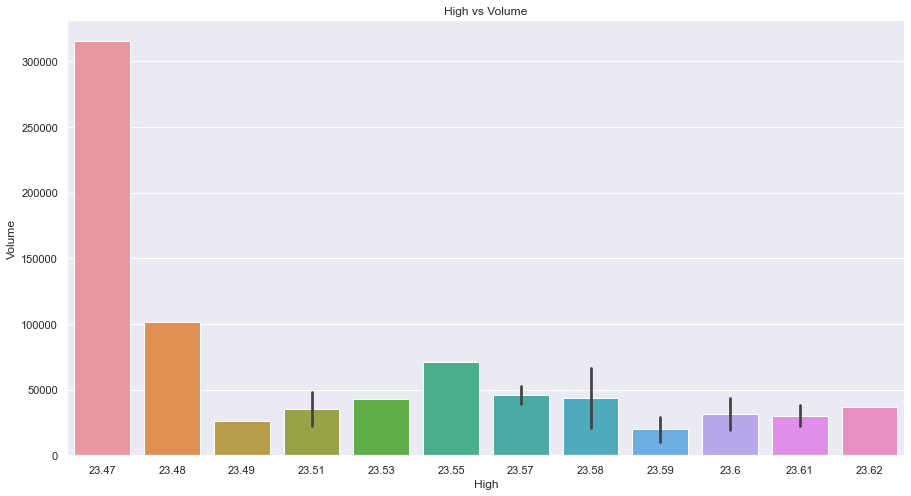

In [150]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
ax=sns.barplot(x = 'High',y = 'Volume',data = df3)
ax.set_title("High vs Volume")
ax.set_ylabel('Volume')
ax.set_xlabel('High')

#### 2. Company Name vs Market Cap

Text(0.5, 0, 'Company')

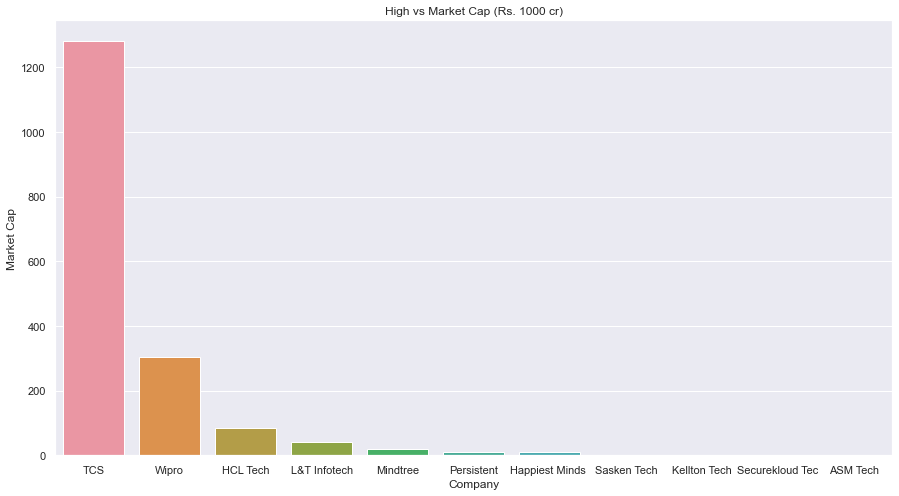

In [154]:
sns.set(rc = {'figure.figsize':(15,8)})
ax=sns.barplot(x = 'Company Name',y = 'Market Cap (Rs. 1000 cr)',data = df2)
ax.set_title("High vs Market Cap (Rs. 1000 cr)")
ax.set_ylabel('Market Cap')
ax.set_xlabel('Company')

#### 3. Heatmap

<AxesSubplot:>

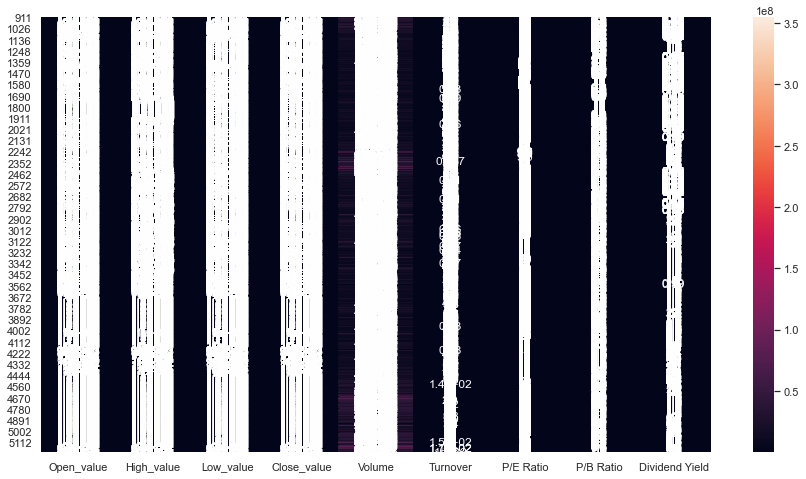

In [165]:
sns.heatmap(df1[['Open_value','High_value','Low_value','Close_value','Volume','Turnover',
                 'P/E Ratio','P/B Ratio','Dividend Yield']],annot=True)

#### 4. Dataframe1 Highvalue and Dataframe 3 Highvalue 

In [169]:
df3.rename(columns={'Date':'Date','Low':'Low_value','Volume':'Volume',
                    'Open':'Open_value','close':'Colse_value','High':'High_value'},inplace=True)

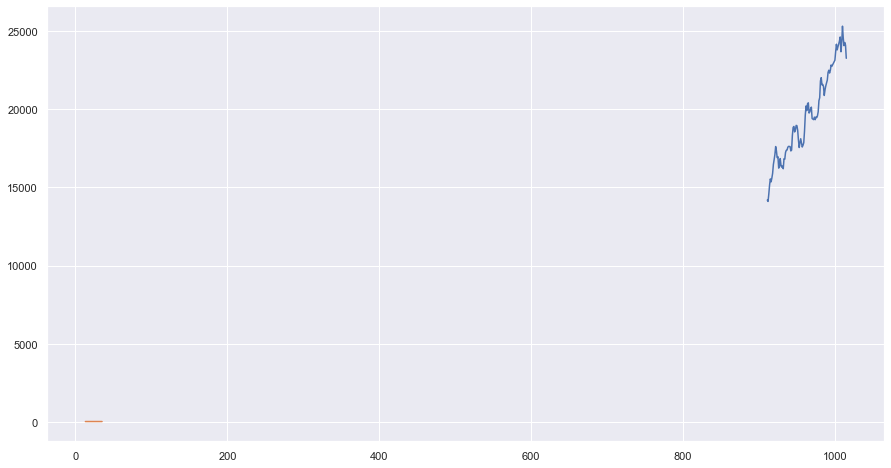

In [194]:
import matplotlib.pyplot as plt

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

ax1.plot(df1['High_value'][0:100])
ax1.plot(df3['High_value'])

#### 5. Dataframe1 Volume and Dataframe 3 Volume 

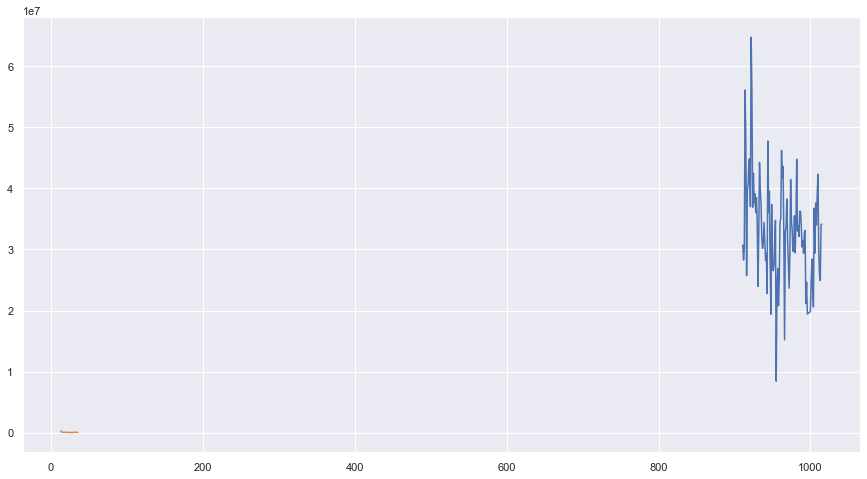

In [197]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

ax1.plot(df1['Volume'][0:100])
ax1.plot(df3['Volume'])

#### Data Source:<br>
Data frame 1 - NSE IT CSV file– Nifty Indices Dataset | Kaggle<br>
Data frame 2 - NSE IT website - NIFTY IT Stock Price, Nifty IT Market Indices, Nifty IT Price, Stock Performance & Comparison (moneycontrol.com)<br>
Data frame 3 - NSE API Calls - maanavshah/stock-market-india: API for Indian Stock Market's NSE and BSE. (github.com)<br><br>
#### Visualization:
1.	High vs volume – This visualization is a bar plot from seaborn to describe the volume sold and its high in a data frame 3.
2.	Company name vs market cap – This visualization is a bar plot from seaborn to describe the company name and its market cap in data frame 2.
3.	Heat map – It’s a visual representation of how the data is distributed in data frame 1. I have set the annotation to true so that it will have all the values in the graph.
4.	High-value comparison – This is a line chart comparing high values in data frame 1 and data frame 3. In this comparison, the high value in a data frame 3 is very small compared to data frame 1. So, the visualization is not appropriate. 
5.	Volume comparison – This is a line chart comparing volumes in data frame 1 and data frame 3. As with the above comparison, here also the visualization is not appropriate.<br><br>

#### Things learned:<br>
In this project, I have learned the following things:<br>
1.	How to perform a web scraping and convert the scraping into a data frame.
2.	How to handle REST API using python and convert it into a data frame.
3.	The important thing in this entire course is the database connectivity between python and the database. I have used SQLite to achieve this and learned how to connect, create a table, select a table, etc.
